In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import json
from pprint import pprint
from config import g_key
import gmaps

In [3]:
# create filepath and load data files
superbowl_data = "../Super_Bowl.csv"
superbowl_df = pd.read_csv(superbowl_data)
weather_data = "../weather_data.csv"
weather_df = pd.read_csv(weather_data)

# Create superbowl_df with necessary info
superbowl_df = superbowl_df[["SB", "Date", "Winner", "Winning Pts", "Loser", "Losing Pts", "Point Difference",
                             "Stadium", "City", "State", "Attendance" ]]
superbowl_df.head()

# merge datasets
SB_df = pd.merge(superbowl_df, weather_df, on=["SB", "Date", "City", "State"])
SB_df.head()

,SB,Date,Winner,Winning Pts,Loser,Losing Pts,Point Difference,Stadium,City,State,Attendance,Avg Temp (F),Precipitation (in),Dew Point (F),Wind Speed (mph)
0,I,15-Jan-67,Green Bay Packers,35,Kansas City Chiefs,10,25,Memorial Coliseum,Los Angeles,California,61946,61.75,0.0,31.88,9
1,II,14-Jan-68,Green Bay Packers,33,Oakland Raiders,14,19,Orange Bowl,Miami,Florida,75546,59.38,0.0,49.88,16
2,III,12-Jan-69,New York Jets,16,Baltimore Colts,7,9,Orange Bowl,Miami,Florida,75389,65.50,0.0,58.00,15
3,IV,11-Jan-70,Kansas City Chiefs,23,Minnesota Vikings,7,16,Tulane Stadium,New Orleans,Louisiana,80562,57.75,0.0,53.75,18
4,V,17-Jan-71,Baltimore Colts,16,Dallas Cowboys,13,3,Orange Bowl,Miami,Florida,79204,58.54,0.0,45.08,15


In [4]:
# # Create a dataframe to stadium information
# stadium_df = SB_df[["Stadium", "City", "State"]]
# stadium_df = stadium_df.drop_duplicates(subset="Stadium")
# stadium_df["Latitude"] = ""
# stadium_df["Longitude"] = ""

# # Define parameters
# address = stadium_df["Stadium"]
# params = {
#     "address":address,
#     "key": g_key
# }

# # Use the Stadium name to find coordinates
# for index, row in stadium_df.iterrows():
#     address = row["Stadium"]

#     # update location param
#     params["address"] = f"{address}"
#     base_url = "https://maps.googleapis.com/maps/api/geocode/json"

#     # make request and print url
#     name_address = requests.get(base_url, params=params)

#     # convert to json
#     name_address = name_address.json()
    
#     # Skip any responses that are missing a data point.
#     try:
#         stadium_df.loc[index, "Latitude"] = name_address["results"][0]["geometry"]["location"]["lat"]
#         stadium_df.loc[index, "Longitude"] = name_address["results"][0]["geometry"]["location"]["lng"]
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
# stadium_df

,Stadium,City,State,Latitude,Longitude
0,Memorial Coliseum,Los Angeles,California,41.1157,-85.1241
1,Orange Bowl,Miami,Florida,25.9046,-80.326
3,Tulane Stadium,New Orleans,Louisiana,29.9446,-90.1167
7,Rice Stadium,Houston,Texas,29.7163,-95.4093
10,Rose Bowl,Pasadena,California,34.1613,-118.168
11,Superdome,New Orleans,Louisiana,29.9511,-90.0812
14,Louisiana Superdome,New Orleans,Louisiana,29.9511,-90.0812
15,Pontiac Silverdome,Pontiac,Michigan,42.6368,-83.2578
17,Tampa Stadium,Tampa,Florida,27.9759,-82.5033
18,Stanford Stadium,Palo Alto,California,37.4345,-122.161


In [33]:
# # Show locations on map
# gmaps.configure(api_key=g_key)
# locations = stadium_df[["Latitude", "Longitude"]]
# # Customize the size of the figure
# fig = gmaps.figure()
# # Assign the marker layer to a variable
# markers = gmaps.marker_layer(locations)
# # Add the layer to the map
# fig.add_layer(markers)
# fig

Figure(layout=FigureLayout(height='420px'))

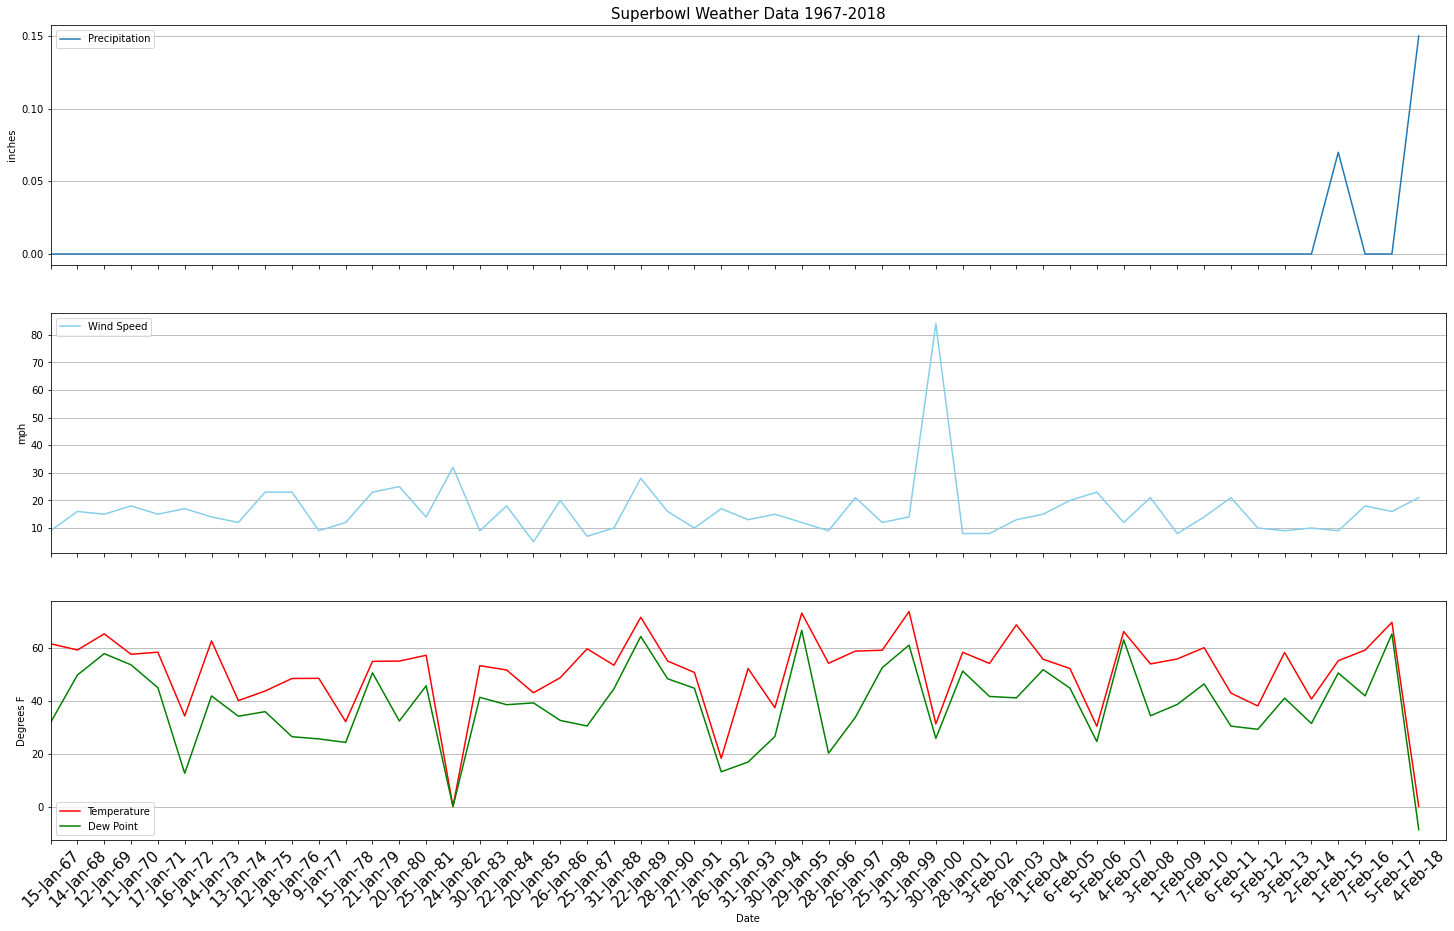

In [6]:
# Plot weather data for each superbowl 1967-2018
x_values = SB_df["Date"]
plt.figure(figsize=(25,15))

# Plot Precipitation
plt.subplot(311)
plt.title("Superbowl Weather Data 1967-2018", fontsize=15)
plt.plot(x_values, SB_df["Precipitation (in)"], label="Precipitation")
plt.gca().axes.xaxis.set_ticklabels([])
plt.xlim(0, len(x_values))
plt.ylabel("inches")
plt.yticks([0, 0.05, 0.1, 0.15])
plt.grid(axis="y")
plt.legend()

# Plot wind speed
plt.subplot(312)
plt.plot(x_values, SB_df["Wind Speed (mph)"], color = "skyblue", label="Wind Speed")
plt.ylabel("mph")
plt.gca().axes.xaxis.set_ticklabels([])
plt.xlim(0, len(x_values))
plt.grid(axis="y")
plt.legend(loc='upper left')

# Plot average temperature and dew point
plt.subplot(313)
plt.plot(x_values, SB_df["Avg Temp (F)"], color="red", label="Temperature")
plt.plot(x_values, SB_df["Dew Point (F)"],color="green", label="Dew Point")
plt.xticks(rotation=45)
plt.xlim(0, len(x_values))
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.ylabel("Degrees F")
plt.grid(axis="y")
plt.legend()

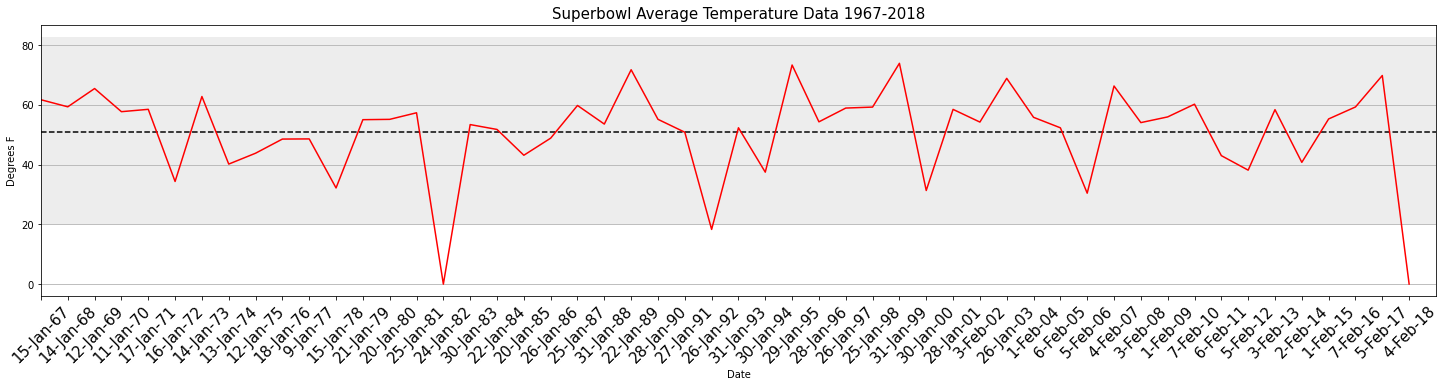

In [7]:
# Calculate stats for average temperature of every superbowl
temperatures = SB_df["Avg Temp (F)"]
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# lower an upper bounds to determine outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

avg_temp = np.mean(temperatures)

# Plot stats
plt.figure(figsize=(25,5))
plt.plot(x_values, SB_df["Avg Temp (F)"], color="red", label="Temperature")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.xlim(0, len(x_values))
plt.ylabel("Degrees F")
plt.title("Superbowl Average Temperature Data 1967-2018", fontsize=15)
plt.grid(axis="y")
plt.axhspan(lower_bound, upper_bound, facecolor='k', alpha=0.07)
plt.hlines(avg_temp, 0, len(x_values), Linestyles='dashed')

68% of the data: 35.695042129114825, 66.27688094780825
95% of the data: 20.404122719768107, 81.56780035715497
99.7% of the data: 5.11320331042139, 96.85871976650168
The standard deviation of the temperature data is 15.290919409346715
The variance of the temperature data is 233.81221638313608


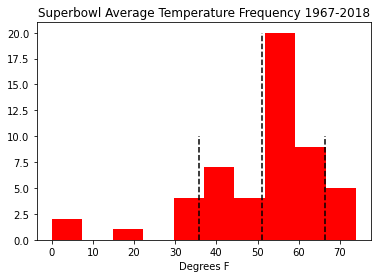

In [8]:
t_sd = np.std(temperatures,ddof = 0)
t_var = np.var(temperatures,ddof = 0)

plt.hist(temperatures, color = "red", label = "Temperature")
plt.xlabel("Degrees F")
plt.title("Superbowl Average Temperature Frequency 1967-2018")
plt.vlines(avg_temp, 0, 20, Linestyles='dashed')
plt.vlines(avg_temp-t_sd, 0, 10, Linestyles='dashed')
plt.vlines(avg_temp+t_sd, 0, 10, Linestyles='dashed')

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"68% of the data: {avg_temp-t_sd}, {avg_temp+t_sd}")
print(f"95% of the data: {avg_temp-2*t_sd}, {avg_temp+2*t_sd}")
print(f"99.7% of the data: {avg_temp-3*t_sd}, {avg_temp+3*t_sd}")
print(f"The standard deviation of the temperature data is {t_sd}")
print(f"The variance of the temperature data is {t_var}")

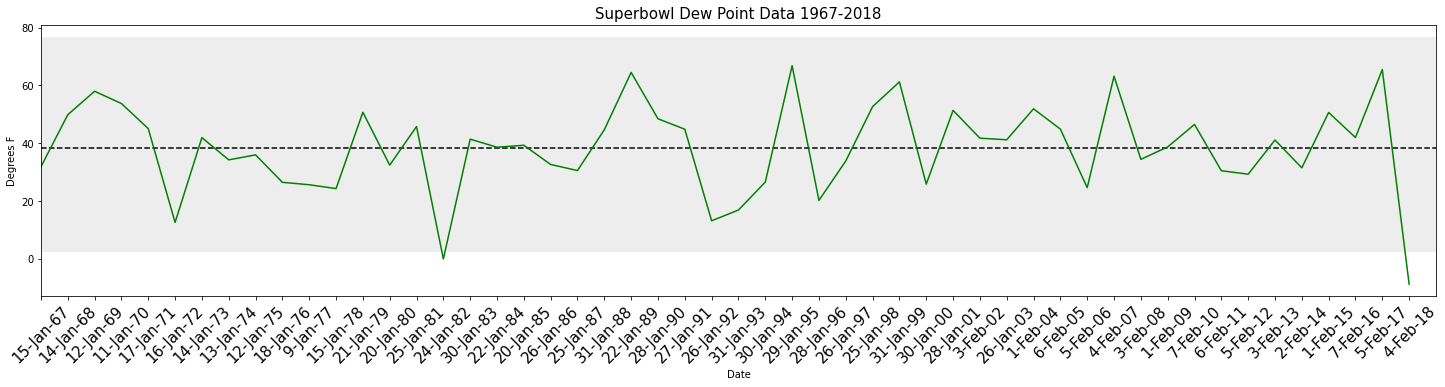

In [66]:
# Calculate stats for average dew point of every superbowl
dew_point = SB_df["Dew Point (F)"]
d_quartiles = dew_point.quantile([.25,.5,.75])
d_lowerq = d_quartiles[0.25]
d_upperq = d_quartiles[0.75]
d_iqr = d_upperq-d_lowerq
# lower an upper bounds to determine outliers
d_lower_bound = d_lowerq - (1.5*d_iqr)
d_upper_bound = d_upperq + (1.5*d_iqr)

avg_dp = np.mean(dew_point)

# Plot stats
plt.figure(figsize=(25,5))
plt.plot(x_values, SB_df["Dew Point (F)"], color="green", label="Temperature")
plt.xlim(0, len(x_values))
plt.ylabel("Degrees F")
plt.title("Superbowl Dew Point Data 1967-2018", fontsize=15)
plt.grid(axis="y")
plt.axhspan(d_lower_bound, d_upper_bound, facecolor='k', alpha=0.07)
plt.hlines(avg_dp, 0, len(x_values), Linestyles='dashed')
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.grid(axis="y")

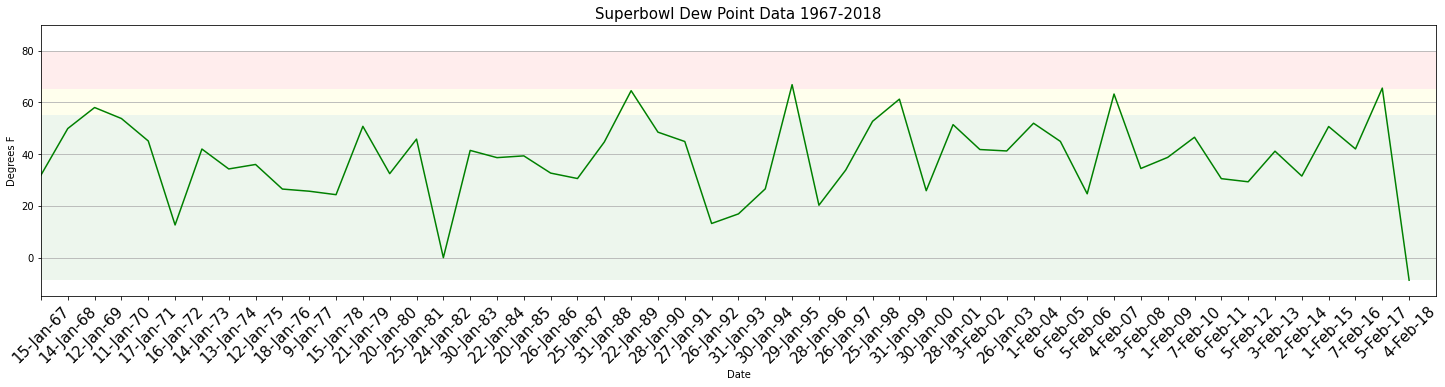

In [65]:
# Plot dew point general comfort ranges
plt.figure(figsize=(25,5))
plt.plot(x_values, SB_df["Dew Point (F)"], color="green", label="Temperature")
plt.ylim(-15, 90)
plt.ylabel("Degrees F")
plt.xlim(0, len(x_values))
#less than or equal to 55: dry and comfortable
plt.axhspan(min(dew_point), 55, facecolor='green', alpha=0.07)
# between 55 and 65: becoming "sticky" with muggy evenings
plt.axhspan(55, 65, facecolor='yellow', alpha=0.07)
# greater than or equal to 65: lots of moisture in the air, becoming oppressive
plt.axhspan(65, 80, facecolor='red', alpha=0.07)
plt.title("Superbowl Dew Point Data 1967-2018", fontsize=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.grid(axis="y")
# citation https://www.weather.gov/arx/why_dewpoint_vs_humidity

68% of the data: 22.735911025039155, 53.88870435957624
95% of the data: 7.159514357770611, 69.46510102684479
99.7% of the data: -8.416882309497936, 85.04149769411333
The standard deviation of the temperature data is 15.576396667268543
The variance of the temperature data is 242.6241331360946


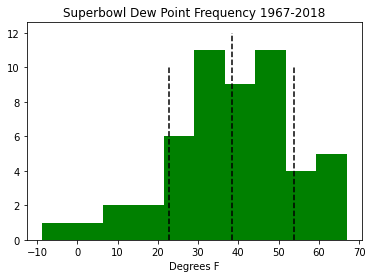

In [10]:
dp_sd = np.std(dew_point,ddof = 0)
dp_var = np.var(dew_point,ddof = 0)

plt.hist(dew_point, color = "green", label = "Dew Point")
plt.xlabel("Degrees F")
plt.title("Superbowl Dew Point Frequency 1967-2018")
plt.vlines(avg_dp, 0, 12, Linestyles='dashed')
plt.vlines(avg_dp-dp_sd, 0, 10, Linestyles='dashed')
plt.vlines(avg_dp+dp_sd, 0, 10, Linestyles='dashed')

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"68% of the data: {avg_dp-dp_sd}, {avg_dp+dp_sd}")
print(f"95% of the data: {avg_dp-2*dp_sd}, {avg_dp+2*dp_sd}")
print(f"99.7% of the data: {avg_dp-3*dp_sd}, {avg_dp+3*dp_sd}")
print(f"The standard deviation of the temperature data is {dp_sd}")
print(f"The variance of the dew point data is {dp_var}")

Text(0.5, 1.0, 'Superbowl Attendance Data 1967-2018')

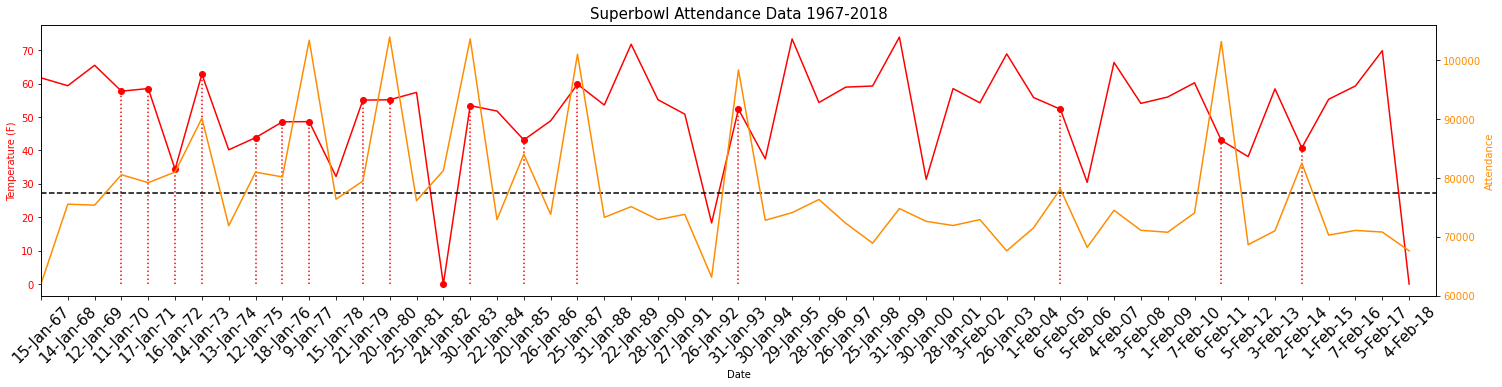

In [12]:
attendance = SB_df["Attendance"]
avg_att = np.mean(attendance)
# a_quartiles = attendance.quantile([.25,.5,.75])
# a_lowerq = a_quartiles[0.25]
# a_upperq = a_quartiles[0.75]
# a_iqr = a_upperq-a_lowerq
# # lower an upper bounds to determine outliers
# a_lower_bound = a_lowerq - (1.5*d_iqr)
# a_upper_bound = a_upperq + (1.5*d_iqr)

# Find temperatures that yield higher than average attendance
high_att = SB_df.loc[SB_df["Attendance"] > avg_att]
good_weather = high_att[["Date", "Avg Temp (F)", "Dew Point (F)", "Attendance"]]

# Plot attendance and temperature
fig, temp = plt.subplots(1,1,figsize=(25,5))
temp.set_xlabel("Date")
temp.set_ylabel('Temperature (F)', color='red')
temp.plot(x_values, SB_df["Avg Temp (F)"], color="red", label="Temperature")
temp.tick_params(axis='y', labelcolor="red")
plt.stem(good_weather["Date"], good_weather["Avg Temp (F)"], markerfmt=("o", "red"), linefmt=(":", "red"), basefmt=" ", use_line_collection = True)

att = temp.twinx()  # instantiate a second axes that shares the same x-axis
att.set_ylabel('Attendance', color="darkorange")  # we already handled the x-label with ax1
att.plot(x_values, SB_df["Attendance"], color = "darkorange", label = "Attendance")
att.tick_params(axis='y', labelcolor="darkorange")
# att.axhspan(a_upper_bound, max(attendance), facecolor='k', alpha=0.07)
plt.hlines(avg_att, 0, len(x_values), Linestyles='dashed')

temp.tick_params(axis='x', labelrotation=45, which='major', labelsize=15)
plt.xlim(0, len(x_values))
plt.title("Superbowl Attendance Data 1967-2018", fontsize=15)

In [13]:
# Calculate correlation between higher than average attendance and the temperature
goodtemp_corr = sts.pearsonr(good_weather["Avg Temp (F)"], good_weather["Attendance"])
print(f"The correlation between higher than average attendance and the temperature is {round(goodtemp_corr[0], 2)}")

# Calculate correlation between lower than average attendance and the temperature
low_att = SB_df.loc[SB_df["Attendance"] < avg_att]
bad_weather = low_att[["Date", "Avg Temp (F)", "Dew Point (F)", "Attendance"]]

badtemp_corr = sts.pearsonr(bad_weather["Avg Temp (F)"], bad_weather["Attendance"])
print(f"The correlation between lower than average attendance and the temperature is {round(badtemp_corr[0], 2)}")

The correlation between higher than average attendance and the temperature is 0.25
The correlation between lower than average attendance and the temperature is 0.35


Text(0.5, 1.0, 'Superbowl Attendance Data 1967-2018')

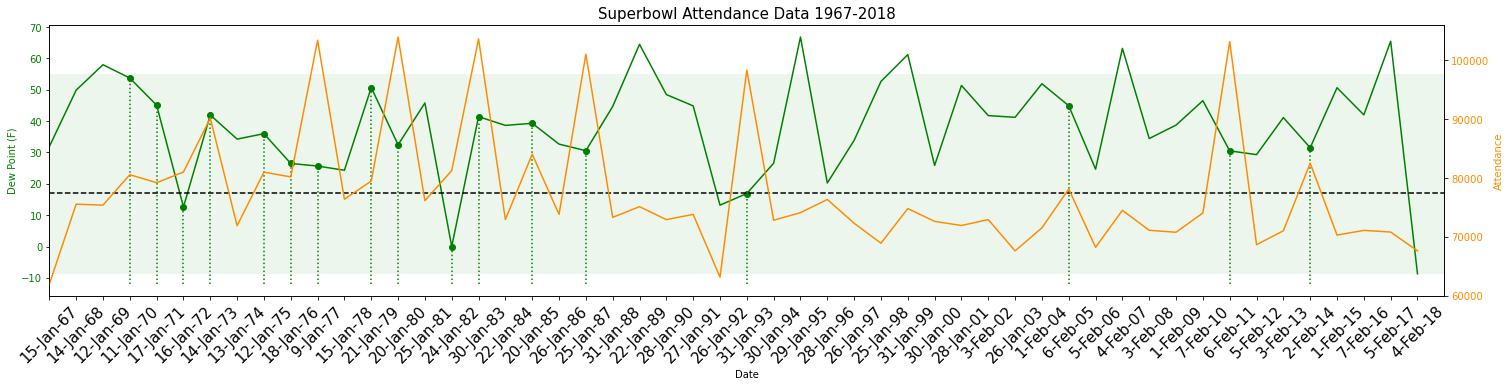

In [37]:
# Plot attendance and dew point
fig, dewpoint = plt.subplots(1,1,figsize=(25,5))
dewpoint.set_xlabel("Date")
dewpoint.set_ylabel('Dew Point (F)', color='green')
dewpoint.plot(x_values, SB_df["Dew Point (F)"], color="green", label="Dew Point")
dewpoint.tick_params(axis='y', labelcolor="green")
#less than or equal to 55: dry and comfortable
plt.axhspan(min(dew_point), 55, facecolor='green', alpha=0.07)
plt.stem(good_weather["Date"], good_weather["Dew Point (F)"], markerfmt=("o", "green"), linefmt=(":", "green"), bottom = -12, basefmt=" ", use_line_collection = True)


att = dewpoint.twinx()  # instantiate a second axes that shares the same x-axis
att.set_ylabel('Attendance', color="darkorange")  # we already handled the x-label with ax1
att.plot(x_values, SB_df["Attendance"], color = "darkorange", label = "Attendance")
att.tick_params(axis='y', labelcolor="darkorange")
# att.axhspan(a_upper_bound, max(attendance), facecolor='k', alpha=0.07)
# avg_att = np.mean(attendance)
plt.hlines(avg_att, 0, len(x_values), Linestyles='dashed')

dewpoint.tick_params(axis='x', labelrotation=45, which='major', labelsize=15)
plt.xlim(0, len(x_values))
plt.title("Superbowl Attendance Data 1967-2018", fontsize=15)

In [15]:
# Calculate correlation between higher than average attendance and the dew point
gooddp_corr = sts.pearsonr(good_weather["Dew Point (F)"], good_weather["Attendance"])
print(f"The correlation between higher than average attendance and the dew point is {round(gooddp_corr[0], 2)}")

baddp_corr = sts.pearsonr(bad_weather["Dew Point (F)"], bad_weather["Attendance"])
print(f"The correlation between lower than average attendance and the dew point is {round(baddp_corr[0], 2)}")

The correlation between higher than average attendance and the dew point is -0.15
The correlation between lower than average attendance and the dew point is 0.41


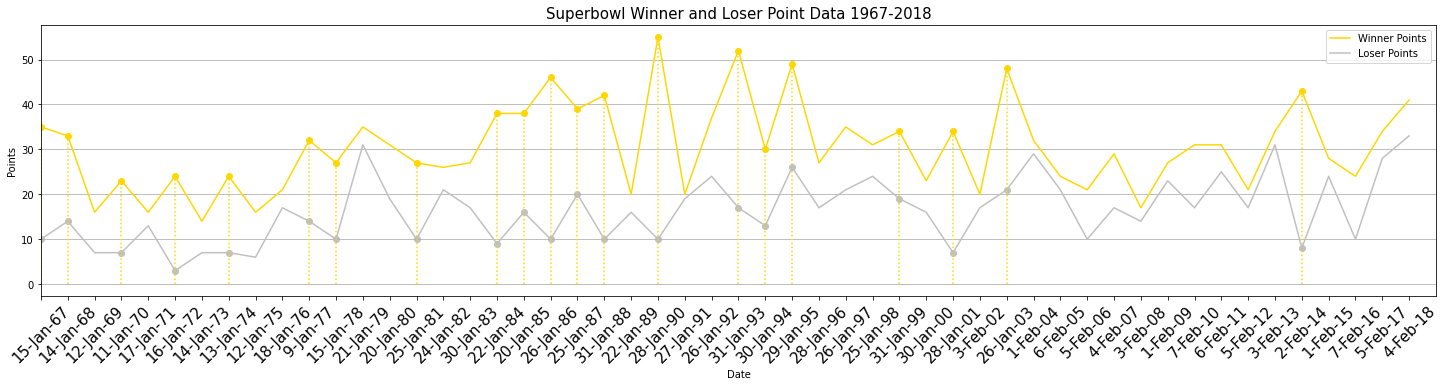

In [20]:
# Find games with higher than average point differences
avg_pointdiff = np.mean(SB_df["Point Difference"])
high_pointdiff = SB_df.loc[SB_df["Point Difference"] > avg_pointdiff]
high_pointdiff = high_pointdiff[["Date", "Winner", "Winning Pts", "Loser", "Losing Pts", "Point Difference"]]

# Plot winner/loser points
plt.figure(figsize=(25,5))
plt.plot(x_values, SB_df["Winning Pts"], color="gold", label="Winner Points")
plt.plot(x_values, SB_df["Losing Pts"], color="silver", label="Loser Points")
# Plot higher than average point differences
plt.stem(high_pointdiff["Date"], high_pointdiff["Winning Pts"], markerfmt=("o", "gold"), linefmt=(":", "gold"), basefmt=" ", use_line_collection=True)
plt.scatter(high_pointdiff["Date"], high_pointdiff["Losing Pts"], color = "silver")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.xlim(0, len(x_values))
plt.ylabel("Points")
plt.title("Superbowl Winner and Loser Point Data 1967-2018", fontsize=15)
plt.grid(axis="y")
plt.legend()

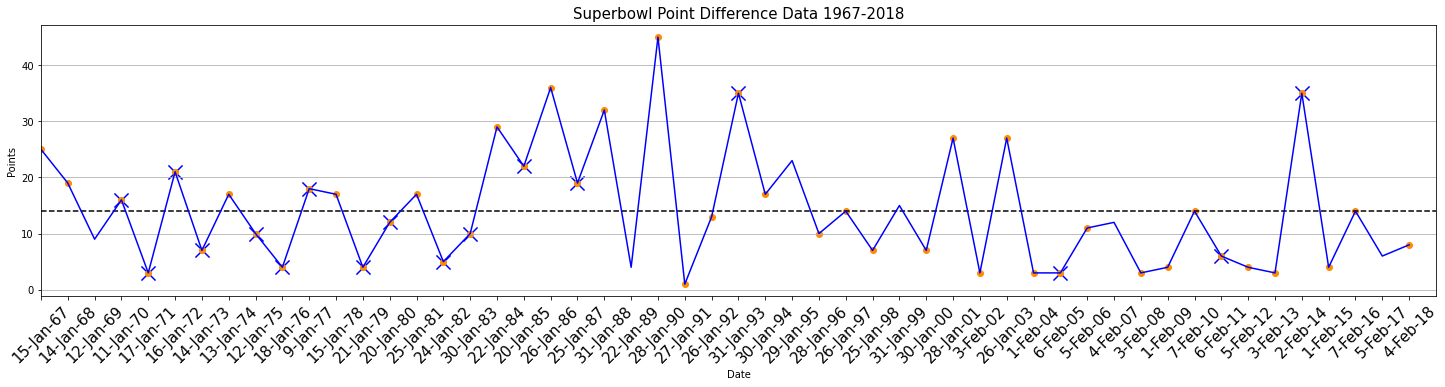

In [57]:
# Create data set of winner/loser points on dates with "good weather"
point_df = SB_df[["Date", "Winner", "Winning Pts", "Loser", "Losing Pts", "Point Difference"]]
good_temp_points = pd.merge(good_weather, point_df, on="Date", how="left")
good_dewpoints = SB_df.loc[SB_df["Dew Point (F)"] < 55]
avg_winpoints = np.mean(SB_df["Point Difference"])

# does the winning team score higher than average on day with "good weather"?
plt.figure(figsize=(25,5))
plt.plot(x_values, SB_df["Point Difference"], color="blue", label="Point Difference")
plt.scatter(good_temp_points["Date"], good_temp_points["Point Difference"], color="blue", marker="x", s=200)
plt.scatter(good_dewpoints["Date"], good_dewpoints["Point Difference"], color="darkorange")
plt.hlines(avg_winpoints, 0, len(x_values), Linestyles='dashed')
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Date")
plt.xlim(0, len(x_values))
plt.ylabel("Points")
plt.title("Superbowl Point Difference Data 1967-2018", fontsize=15)
plt.grid(axis="y")

In [60]:
# Calculate correlation between higher than average attendance and the dew point
windp_corr = sts.pearsonr(good_dewpoints["Dew Point (F)"], good_dewpoints["Point Difference"])
print(f"The correlation between winner and loser point difference and the dew point is {round(windp_corr[0], 2)}")

winTemp_corr = sts.pearsonr(good_temp_points["Avg Temp (F)"], good_temp_points["Point Difference"])
print(f"The correlation between winner and loser point difference and the temperature is {round(winTemp_corr[0], 2)}")

The correlation between winner and lose point difference and the dew point is 0.0
The correlation between winner and loser point difference and the temperature is -0.0
